# **Wine Quality Prediction**
wine quality is influenced by various physicochemical properties.
Here are some features commonly found in wine quality datasets and how they impact the quality:

Summary of the Dataset:
The dataset contains 6,497 entries with 13 columns.
The target variable is "quality", which is an integer rating.

The feature "type" is categorical (white or red wine).

There are some missing values in columns like "fixed acidity," "volatile acidity," "citric acid," etc.





In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/winequalityN.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Display column names
print(df.columns)


Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [ ]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# **Handling Missing Values**

In [ ]:
# Check for missing values
print(df.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [ ]:
import numpy as np
# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number)

# Fill NaN values in numeric columns with their respective means
df[numeric_cols.columns] = df[numeric_cols.columns].fillna(numeric_cols.mean())

print(df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# **Exploratory Data Analysis (EDA):**

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# **Create Boxplots to Detect Outliers**

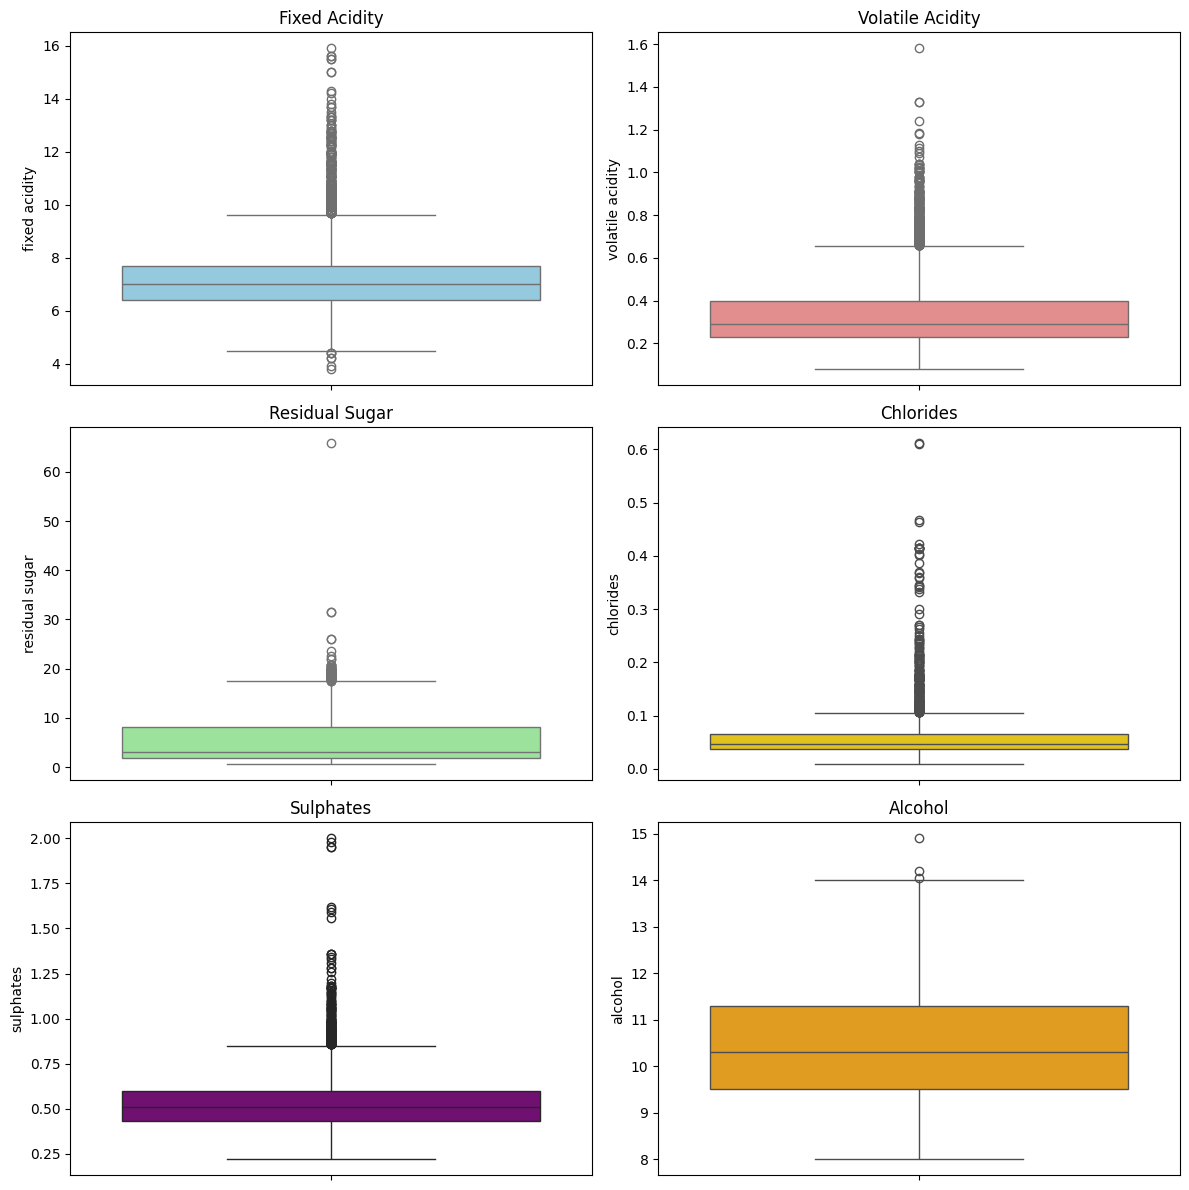

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axes for multiple boxplots
fig, axes = plt.subplots(3, 2, figsize=(12,12))  # 3 rows, 2 columns layout

# Plot boxplots for key numerical variables
sns.boxplot(y=df["fixed acidity"], ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Fixed Acidity")  # Title for the subplot

sns.boxplot(y=df["volatile acidity"], ax=axes[0, 1], color="lightcoral")
axes[0, 1].set_title("Volatile Acidity")

sns.boxplot(y=df["residual sugar"], ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Residual Sugar")

sns.boxplot(y=df["chlorides"], ax=axes[1, 1], color="gold")
axes[1, 1].set_title("Chlorides")

sns.boxplot(y=df["sulphates"], ax=axes[2, 0], color="purple")
axes[2, 0].set_title("Sulphates")

sns.boxplot(y=df["alcohol"], ax=axes[2, 1], color="orange")
axes[2, 1].set_title("Alcohol")

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


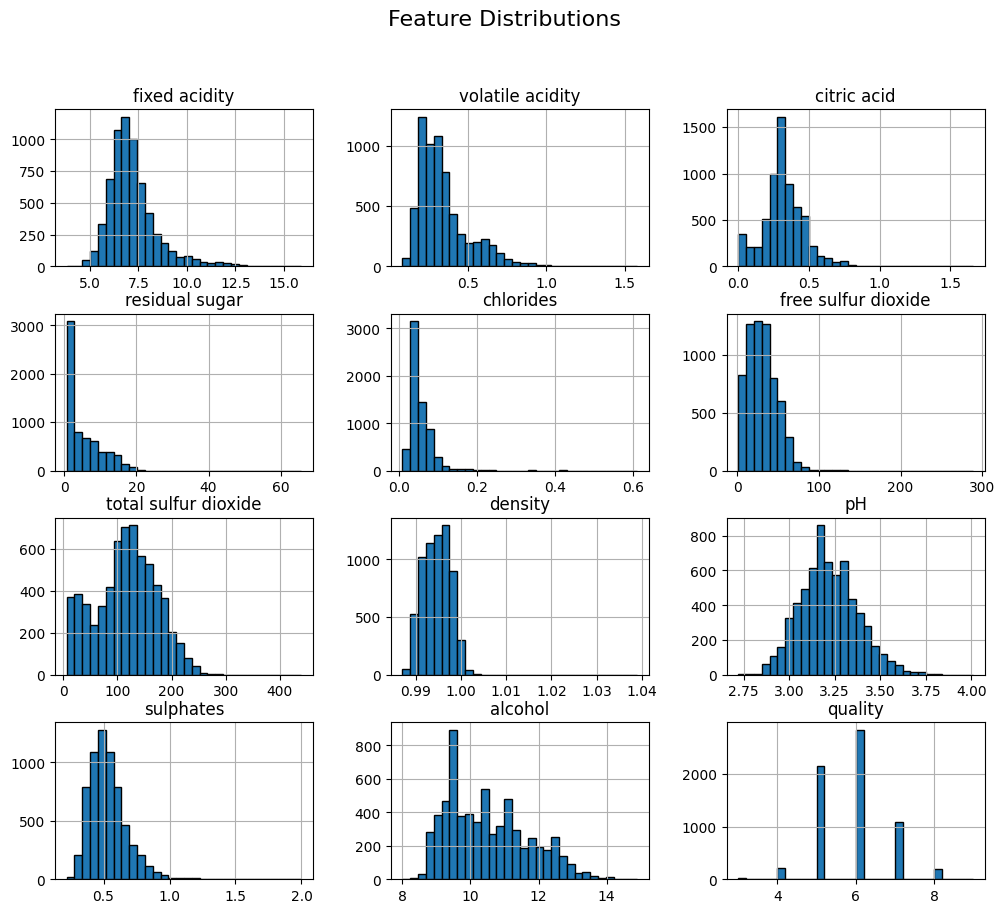

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()



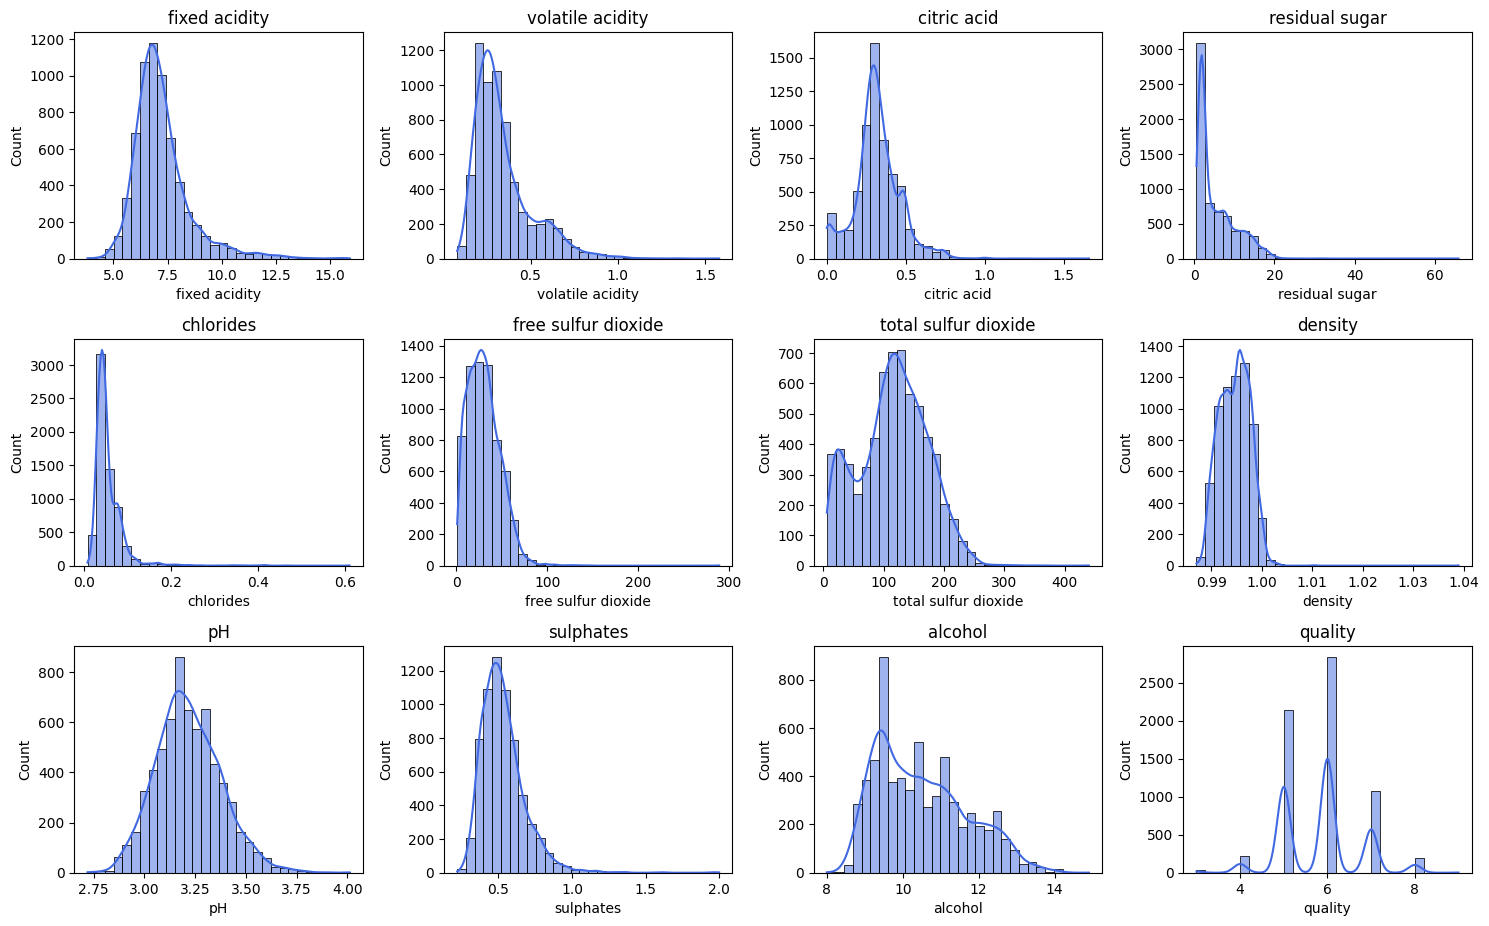

In [ ]:
# Select numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Set figure size
plt.figure(figsize=(15, 12))

# Loop through features and plot histogram with KDE (Kernel Density Estimate)

for i, feature in enumerate(numerical_features, 1):  # The enumerate() function in Python adds an index (counter) to an iterable (e.g., list, tuple, string, etc.), allowing you to loop over it while keeping track of the index.

    plt.subplot(4, 4, i)  # Adjust for number of features
    sns.histplot(df[feature], kde=True, bins=30, color="royalblue")
    plt.title(feature)

plt.tight_layout()
plt.show()


# example for  enumerate:

#fruits = ["apple", "banana", "cherry"]

#for i, fruit in enumerate(fruits, 1):
    #print(i, fruit)

# OUTPUT

# 1 apple
# 2 banana
# 3 cherry

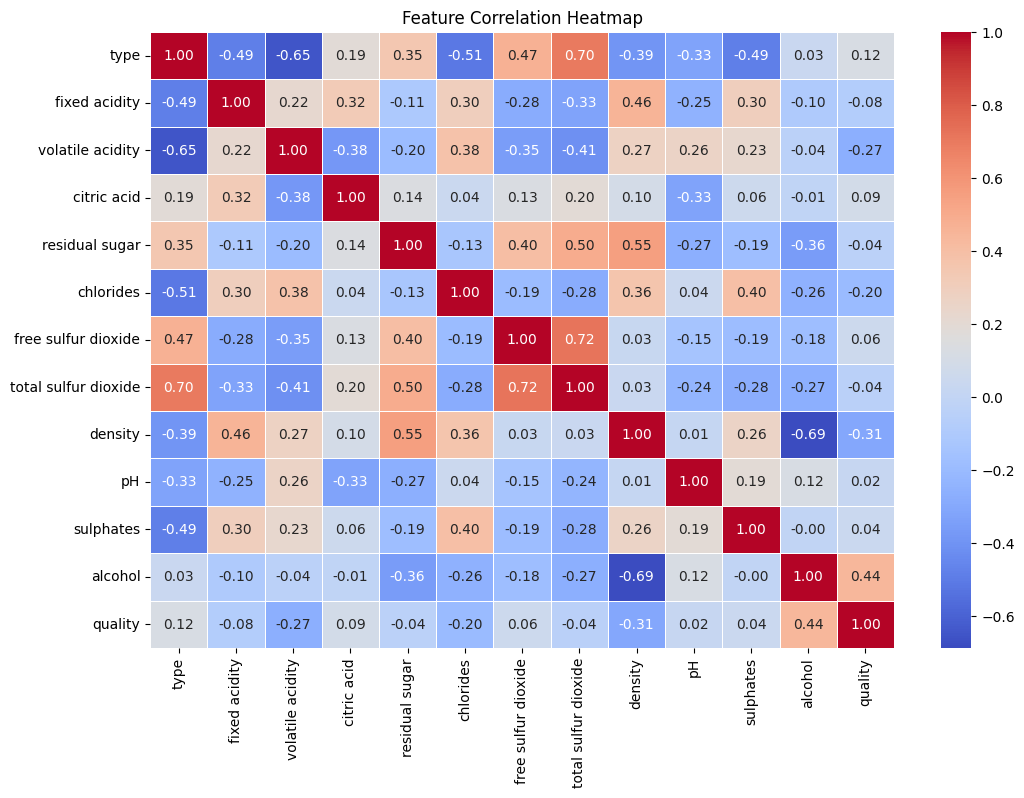

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical 'type' column to numerical (0 = red, 1 = white)
df['type'] = df['type'].map({'red': 0, 'white': 1})

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()






In [ ]:
from sklearn.preprocessing import StandardScaler


# Extract independent variables (excluding 'quality' and 'type')
X = df.drop(columns=['quality', 'type'])
y = df['quality']  # Target variable

# Standardize all numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with correct feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display first 5 rows after scaling
print(X_scaled_df.head())






   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.167159         -0.423564     0.284245        3.206977  -0.315222   
1      -0.707427         -0.241232     0.146523       -0.808136  -0.201027   
2       0.681835         -0.362786     0.559689        0.306005  -0.172479   
3      -0.012796         -0.666673     0.008801        0.642350   0.055911   
4      -0.012796         -0.666673     0.008801        0.642350   0.055911   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.815565              0.959976  2.102214 -1.359665  -0.545959   
1            -0.931107              0.287618 -0.232332  0.508045  -0.277064   
2            -0.029599             -0.331660  0.134525  0.259017  -0.613183   
3             0.928254              1.243074  0.301278 -0.176782  -0.882078   
4             0.928254              1.243074  0.301278 -0.176782  -0.882078   

    alcohol  
0 -1.418558  
1 -0.831615  
2 -0.328521  


# **Train & Evaluate Machine Learning Models**

## **Split Data into Train & Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (5197, 11)
Testing data shape: (1300, 11)


# **Train Support Vector Classifier (SVC)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVC model
svc = SVC(kernel='rbf')


#
SVC(kernel='rbf') → We initialize the Support Vector Classifier with the Radial Basis Function (RBF) kernel, which is commonly used for classification problems.

Other kernel options: 'linear', 'poly', 'sigmoid'.

In [ ]:
# Train the model
svc.fit(X_train, y_train)


SVC()

In [ ]:
# Make predictions
y_pred_svc = svc.predict(X_test)


In [ ]:

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Print results
print(f"Accuracy of SVC: {accuracy_svc:.4f}")


Accuracy of SVC: 0.5677


In [ ]:
# Detailed classification report
print("Classification Report for SVC:\n")
print(classification_report(y_test, y_pred_svc))


Classification Report for SVC:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.61      0.64      0.63       428
           6       0.54      0.74      0.62       567
           7       0.58      0.22      0.32       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1300
   macro avg       0.25      0.23      0.22      1300
weighted avg       0.53      0.57      0.53      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **SVC has moderate accuracy (54%) but fails on rare classes.**

# **Handle Class Imbalance with SMOTE**

# What is SMOTE? (Synthetic Minority Over-sampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a resampling method used to balance an imbalanced dataset by generating synthetic samples for the minority class instead of simply duplicating existing ones.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE with k_neighbors=2
smote = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))



Class distribution before SMOTE: Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})
Class distribution after SMOTE: Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})


# **Feature Scaling**

**SVC and Naïve Bayes work better when data is normalized.
StandardScaler ensures all features have mean = 0 and standard deviation = 1.**


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now apply feature scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

print("Feature scaling applied successfully!")


Feature scaling applied successfully!


# **Train Models**

## **1) Train SVC  model**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Train SVC
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Predict on test data
y_pred_svc = svc_model.predict(X_test)

# Print classification report
print("Classification Report for SVC:\n", classification_report(y_test, y_pred_svc))


Classification Report for SVC:
               precision    recall  f1-score   support

           3       0.95      0.98      0.96       576
           4       0.72      0.83      0.77       568
           5       0.59      0.53      0.56       569
           6       0.50      0.33      0.39       574
           7       0.53      0.59      0.56       561
           8       0.72      0.82      0.77       597
           9       0.99      1.00      0.99       526

    accuracy                           0.72      3971
   macro avg       0.71      0.73      0.72      3971
weighted avg       0.71      0.72      0.71      3971



# **2) Train Naïve Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Print classification report
print("Classification Report for Naïve Bayes:\n", classification_report(y_test, y_pred_nb))


Classification Report for Naïve Bayes:
               precision    recall  f1-score   support

           3       0.63      0.40      0.49       576
           4       0.43      0.48      0.46       568
           5       0.31      0.40      0.35       569
           6       0.27      0.07      0.11       574
           7       0.24      0.14      0.17       561
           8       0.35      0.65      0.45       597
           9       0.74      0.90      0.81       526

    accuracy                           0.43      3971
   macro avg       0.42      0.43      0.41      3971
weighted avg       0.42      0.43      0.40      3971



# **(3) Train Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       576
           4       0.92      0.99      0.95       568
           5       0.78      0.76      0.77       569
           6       0.75      0.65      0.70       574
           7       0.81      0.88      0.85       561
           8       0.97      0.99      0.98       597
           9       1.00      1.00      1.00       526

    accuracy                           0.89      3971
   macro avg       0.89      0.89      0.89      3971
weighted avg       0.89      0.89      0.89      3971



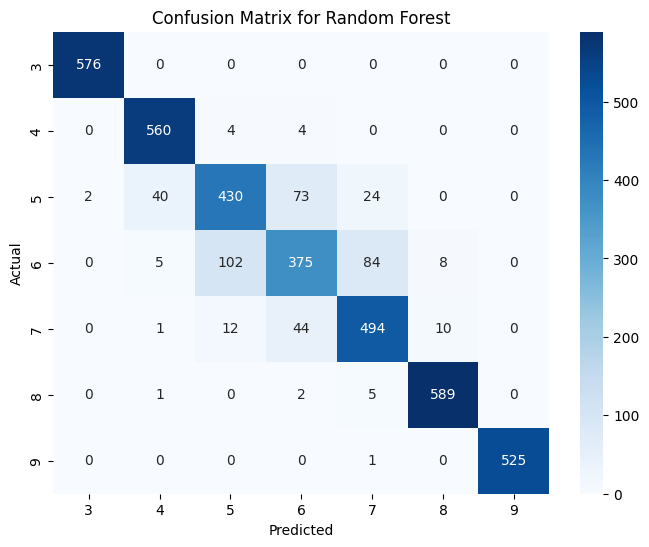

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


# **Feature Importance**

<ipython-input-30-bc5b6f98a908>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


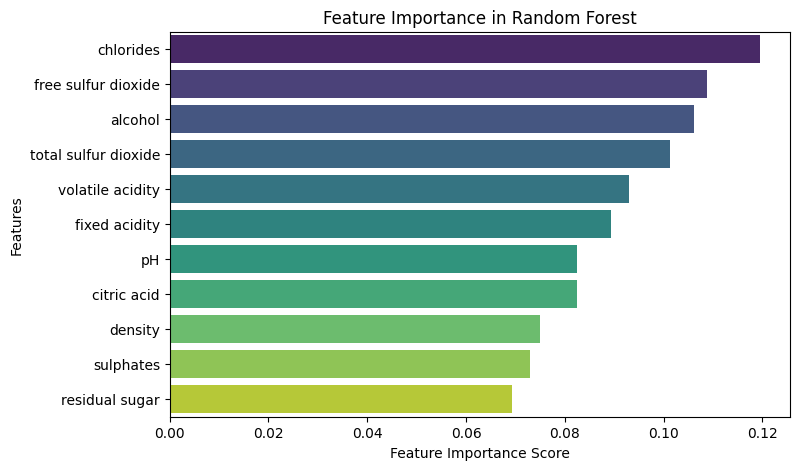

In [ ]:
# Get feature importances
feature_importance = rf_model.feature_importances_

# Create DataFrame for visualization
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


# **Perform Cross-Validation for Robust Testing**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)

# Print average accuracy
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 0.51


# **Compute and Compare Model Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dictionary to store the results
model_results = {}

# Function to evaluate models
def evaluate_model(name, y_true, y_pred):
    model_results[name] = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "F1-Score": f1_score(y_true, y_pred, average="weighted"),
    }

In [ ]:
# Evaluate each model
evaluate_model("SVC", y_test, y_pred_svc)
evaluate_model("Naïve Bayes", y_test, y_pred_nb)
evaluate_model("Random Forest", y_test, y_pred_rf)


In [ ]:

# Print results
import pandas as pd
results_df = pd.DataFrame(model_results).T
print(results_df)

               Accuracy  Precision    Recall  F1-Score
SVC            0.722992    0.71161  0.722992  0.713297
Naïve Bayes    0.431126    0.42020  0.431126  0.402647
Random Forest  0.893730    0.89092  0.893730  0.891420


# **Analyze the Results**

The model with higher Accuracy is generally better.

A higher Precision means fewer false positives.

A higher Recall means fewer false negatives.

F1-Score balances both Precision and Recall.#

# **Deploying the Wine Quality Prediction Model**

## **Save the Trained Model**

In [ ]:
# prompt: Save the Trained Model

import pickle

# Assuming 'rf_model' is your trained Random Forest model
# Save the model to a file
filename = 'wine_quality_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

print(f"Model saved to {filename}")


Model saved to wine_quality_model.pkl


In [ ]:
# prompt: download the file

from google.colab import files

files.download('wine_quality_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>